# Credit Card Fraud Detection using CNN

## Goal
- Build a neural network to classify credit card transactions

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2.3.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

In [3]:
df = pd.read_csv('/Users/Any/Documents/Personal Projects/Kaggle/creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

## Data Preprocessing

### Standardization

In [6]:

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [7]:
scaled_amount = df['amount']
scaled_time = df['time']

df.drop(['amount', 'time'], axis=1, inplace=True)
df.insert(0, 'amount', scaled_amount)
df.insert(1, 'time', scaled_time)

df.head()

,amount,time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Balancing the data set (creating a subsample)

In [9]:
#non_fraud = df[df['Class'] == 0]
#fraud = df[df['Class'] == 1]

In [10]:

# shuffle the data before creating the subset

df = df.sample(frac=1)

# the amount of fraud classes is 492
non_fraud = df.loc[df['Class'] == 0][:492]
fraud = df.loc[df['Class'] == 1]

normal_distributed_df = pd.concat([fraud, non_fraud])

# Shuffle dataframe rows
sub_df = normal_distributed_df.sample(frac=1, random_state=42)
# new_df is the new random subset data created

sub_df.head()

,amount,time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
214329,-0.167680,0.645391,-0.360343,0.932777,-0.477405,-0.684701,1.240493,-0.106208,0.995428,-0.231214,...,0.036657,0.092896,0.582913,-0.338754,0.245553,0.052785,0.590257,-0.324726,-0.075787,0
204079,1.208831,0.592230,1.862102,-0.124052,-1.989752,0.382609,0.473032,-0.674517,0.298621,-0.282416,...,0.150727,-0.204158,-0.511441,0.077874,0.388335,0.007896,-0.120980,-0.019579,0.006155,1
105776,-0.028086,-0.176353,1.243200,-0.464887,0.878392,-0.949533,-1.178980,-0.551000,-0.781283,0.030487,...,-0.054843,0.242139,0.825448,-0.187307,-0.089520,0.544119,-0.521346,0.100007,0.038440,0
12108,-0.293440,-0.747730,-16.917468,9.669900,-23.736443,11.824990,-9.830548,-2.514829,-17.290657,1.820408,...,0.996745,-2.336111,0.972755,1.241866,-1.051086,0.038009,0.672317,2.108471,-1.421243,1
83297,4.152868,-0.292708,-8.257111,-4.814461,-5.365307,1.204230,-3.347420,-1.331601,-1.967893,1.295438,...,-1.233987,0.436390,-0.077553,-3.091624,-0.390201,-0.288689,-0.340004,0.039819,-1.007900,1


In [11]:
sub_df

,amount,time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
214329,-0.167680,0.645391,-0.360343,0.932777,-0.477405,-0.684701,1.240493,-0.106208,0.995428,-0.231214,...,0.036657,0.092896,0.582913,-0.338754,0.245553,0.052785,0.590257,-0.324726,-0.075787,0
204079,1.208831,0.592230,1.862102,-0.124052,-1.989752,0.382609,0.473032,-0.674517,0.298621,-0.282416,...,0.150727,-0.204158,-0.511441,0.077874,0.388335,0.007896,-0.120980,-0.019579,0.006155,1
105776,-0.028086,-0.176353,1.243200,-0.464887,0.878392,-0.949533,-1.178980,-0.551000,-0.781283,0.030487,...,-0.054843,0.242139,0.825448,-0.187307,-0.089520,0.544119,-0.521346,0.100007,0.038440,0
12108,-0.293440,-0.747730,-16.917468,9.669900,-23.736443,11.824990,-9.830548,-2.514829,-17.290657,1.820408,...,0.996745,-2.336111,0.972755,1.241866,-1.051086,0.038009,0.672317,2.108471,-1.421243,1
83297,4.152868,-0.292708,-8.257111,-4.814461,-5.365307,1.204230,-3.347420,-1.331601,-1.967893,1.295438,...,-1.233987,0.436390,-0.077553,-3.091624,-0.390201,-0.288689,-0.340004,0.039819,-1.007900,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153823,-0.275554,0.182462,-19.641857,14.706335,-22.801238,12.114672,-14.898113,0.840778,-28.011293,-11.919639,...,3.834649,-8.228874,3.318178,2.585212,0.195009,-1.194803,0.038423,-4.126746,-0.645329,1
8615,-0.293440,-0.858363,-3.891192,7.098916,-11.426467,8.607557,-2.065706,-2.985288,-8.138589,2.973928,...,1.382619,1.757085,-0.189709,-0.508629,-1.189308,1.188536,0.605242,1.881529,0.875260,1
128392,-0.167819,-0.070466,1.230632,-0.112824,0.585915,0.819042,-0.060825,1.119887,-0.683591,0.335731,...,-0.050899,-0.121331,-0.160643,-0.233609,-1.382328,0.623089,-0.320361,0.067776,0.011237,0
44556,-0.293440,-0.501662,-4.566342,3.353451,-4.572028,3.616119,-2.493138,-1.090000,-5.551433,0.447783,...,-0.249128,2.674466,-0.020880,-0.302447,-0.086396,-0.516060,-0.295102,0.195985,0.141115,1


In [12]:
fraud.shape, non_fraud.shape

((492, 31), (492, 31))

In [13]:
X = sub_df.drop('Class', axis = 1)
y = sub_df['Class']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [15]:
X_train.shape, y_train.shape

((787, 30), (787,))

In [16]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [17]:
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

In [18]:
X_train.shape, y_train.shape

((787, 30, 1), (787,))

### Building CNN model

In [19]:
epochs = 20
model = Sequential()
model.add(Conv1D(32,2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv1D(64,2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [21]:
model.compile(optimizer= Adam(lr=0.0001), loss='binary_crossentropy', metrics='accuracy')

In [22]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
25/25 [==============================] - 0s 16ms/step - loss: 0.5832 - accuracy: 0.7306 - val_loss: 0.5128 - val_accuracy: 0.7817
Epoch 2/20
25/25 [==============================] - 0s 8ms/step - loss: 0.3755 - accuracy: 0.8539 - val_loss: 0.4253 - val_accuracy: 0.9137
Epoch 3/20
25/25 [==============================] - 0s 7ms/step - loss: 0.2811 - accuracy: 0.8920 - val_loss: 0.3598 - val_accuracy: 0.9036
Epoch 4/20
25/25 [==============================] - 0s 7ms/step - loss: 0.2722 - accuracy: 0.9060 - val_loss: 0.3131 - val_accuracy: 0.9036
Epoch 5/20
25/25 [==============================] - 0s 8ms/step - loss: 0.2511 - accuracy: 0.9149 - val_loss: 0.2790 - val_accuracy: 0.9086
Epoch 6/20
25/25 [==============================] - 0s 10ms/step - loss: 0.2324 - accuracy: 0.9238 - val_loss: 0.2549 - val_accuracy: 0.9086
Epoch 7/20
25/25 [==============================] - 0s 10ms/step - loss: 0.2189 - accuracy: 0.9161 - val_loss: 0.2377 - val_accuracy: 0.9086
Epoch 8/20
25/25 

#### 1. An  92% accuracy is reached
#### 2. Training accuracy and validation accuracy  are close 

#### => Seems like a good fit


#### let's get deeper insights by plotting the learning curve

### Plotting the learning curve

In [23]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

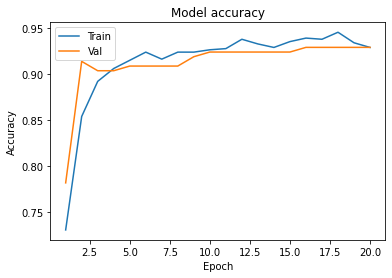

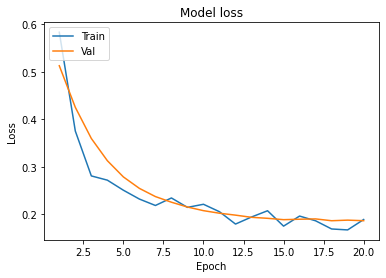

In [24]:
plot_learningCurve(history, epochs)

- Training loss continues to decrease with experience (=> sign of overfitting)
- Validation loss continues to decrease and has a small gap with training loss(=> sign of a good fit)
### => The model is not much overfitting

### Adding MaxPool to improve the accuracy

Epoch 1/20
25/25 [==============================] - 0s 13ms/step - loss: 1.3748 - accuracy: 0.5489 - val_loss: 0.5896 - val_accuracy: 0.6396
Epoch 2/20
25/25 [==============================] - 0s 6ms/step - loss: 0.9070 - accuracy: 0.6569 - val_loss: 0.4863 - val_accuracy: 0.7970
Epoch 3/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6210 - accuracy: 0.7726 - val_loss: 0.4281 - val_accuracy: 0.8629
Epoch 4/20
25/25 [==============================] - 0s 6ms/step - loss: 0.4201 - accuracy: 0.8170 - val_loss: 0.3868 - val_accuracy: 0.8832
Epoch 5/20
25/25 [==============================] - 0s 6ms/step - loss: 0.4658 - accuracy: 0.8259 - val_loss: 0.3529 - val_accuracy: 0.8985
Epoch 6/20
25/25 [==============================] - 0s 6ms/step - loss: 0.3934 - accuracy: 0.8450 - val_loss: 0.3276 - val_accuracy: 0.8985
Epoch 7/20
25/25 [==============================] - 0s 6ms/step - loss: 0.3236 - accuracy: 0.8818 - val_loss: 0.3092 - val_accuracy: 0.8985
Epoch 8/20
25/25 [=

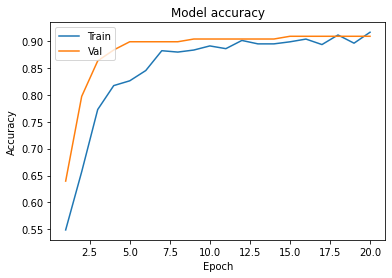

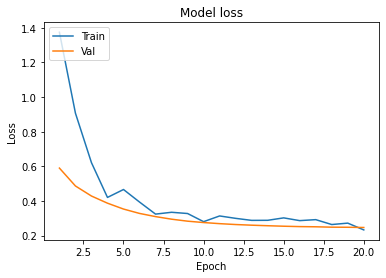

In [25]:
epochs = 20
model = Sequential()
model.add(Conv1D(32,2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))


model.add(Conv1D(64,2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer= Adam(lr=0.0001), loss='binary_crossentropy', metrics='accuracy')
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)
plot_learningCurve(history, epochs)

#### - MaxPool is not improving the accuracy
#### - Training accuracy slightly greater than validation accuracy now.